In [18]:
import pandas
import numpy as np
import seaborn as sns

In [37]:
data=pandas.read_csv('Market_Basket.csv',header=None)

In [38]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.shape

(7500, 20)

In [23]:
data.dtypes

shrimp                object
almonds               object
avocado               object
vegetables mix        object
green grapes          object
whole weat flour      object
yams                  object
cottage cheese        object
energy drink          object
tomato juice          object
low fat yogurt        object
green tea             object
honey                 object
salad                 object
mineral water         object
salmon                object
antioxydant juice     object
frozen smoothie       object
spinach               object
olive oil            float64
dtype: object

In [24]:
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [84]:
item_list=[];
for i in range(0,len(data)):
    for j in range(0,20):
        if pandas.notna(data.iloc[i,j]):
            item_list.append(data.iloc[i,j])


In [83]:
item_list

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 'chutney',
 'turkey',
 'avocado',
 'mineral water',
 'milk',
 'energy bar',
 'whole wheat rice',
 'green tea',
 'low fat yogurt',
 'whole wheat pasta',
 'french fries',
 'soup',
 'light cream',
 'shallot',
 'frozen vegetables',
 'spaghetti',
 'green tea',
 'french fries',
 'eggs',
 'pet food',
 'cookies',
 'turkey',
 'burgers',
 'mineral water',
 'eggs',
 'cooking oil',
 'spaghetti',
 'champagne',
 'cookies',
 'mineral water',
 'salmon',
 'mineral water',
 'shrimp',
 'chocolate',
 'chicken',
 'honey',
 'oil',
 'cooking oil',
 'low fat yogurt',
 'turkey',
 'eggs',
 'turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'sal

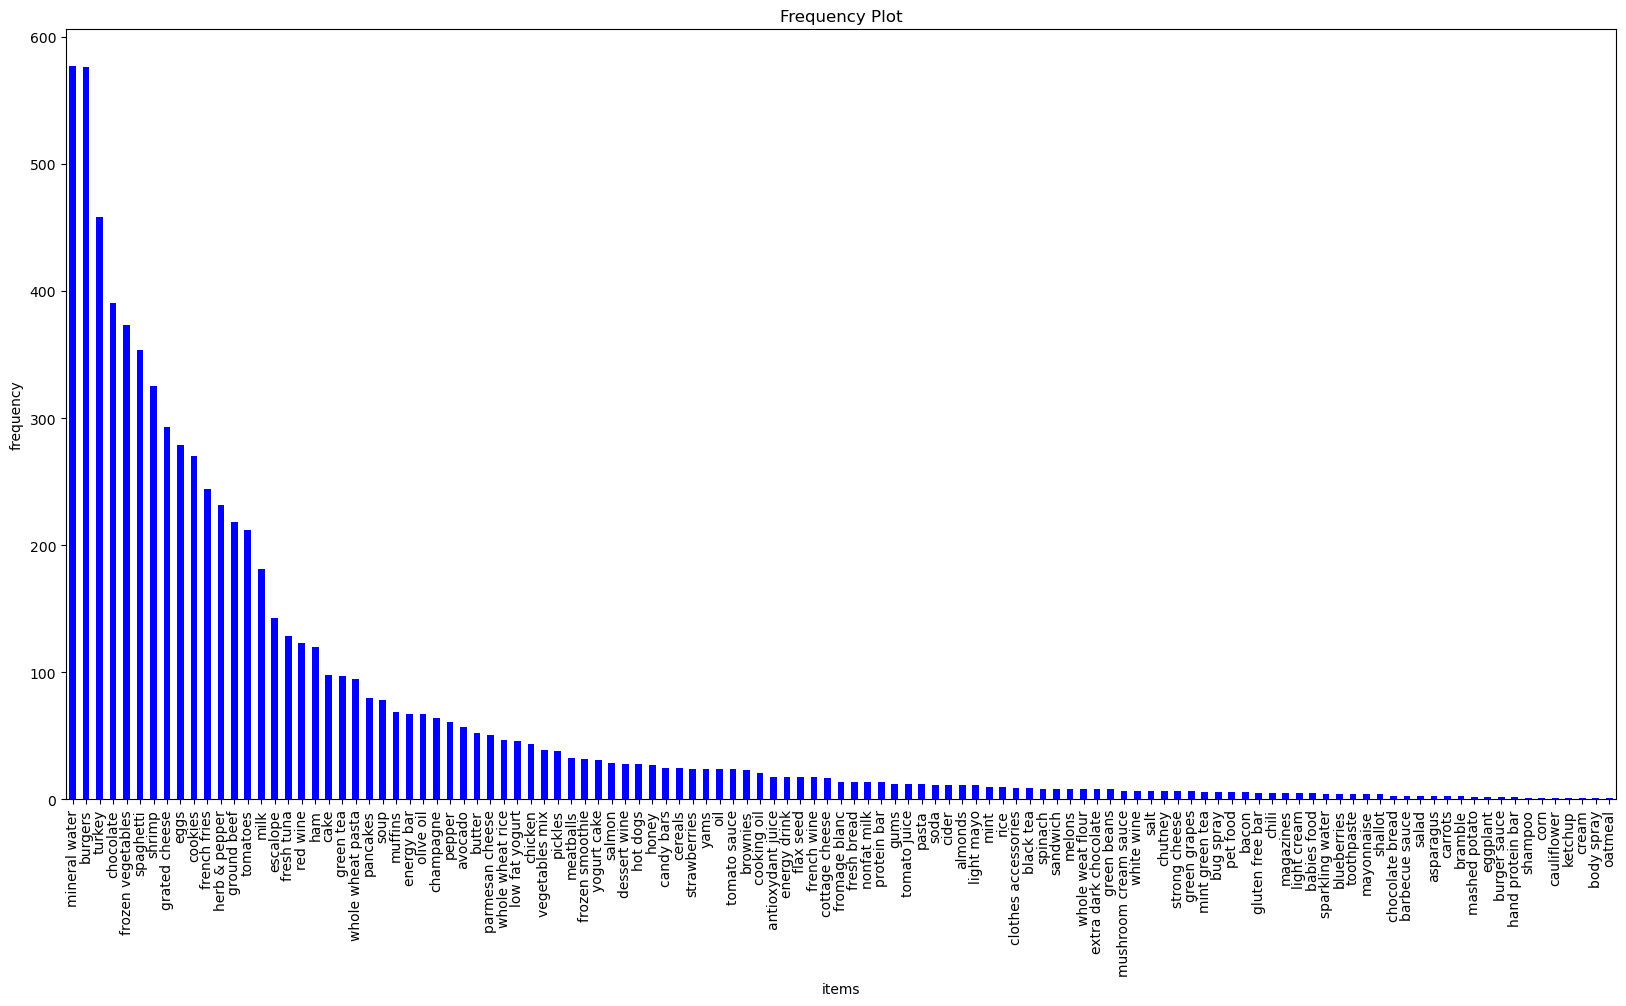

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data[0].value_counts().plot.bar(color='b', figsize=(20,10))   
plt.title('Frequency Plot')
plt.xlabel("items")
plt.ylabel("frequency")
plt.show()

In [43]:
item_list2=[];
for i in range(0,len(data)):
    item_list2.append([str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!='nan'])

In [45]:
from apyori import apriori
Rules=apriori(item_list2,min_support=0.005,min_confidence=0.01,min_lift=3,min_length=2)

In [47]:
association_rule=list(Rules)
association_rule

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'mushroom cream sauce'}), confidence=0.0722689075630252, lift=3.7908326967150496), OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'pasta'}), confidence=0.07394957983193277, lift=4.700811850163794), OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), 

In [49]:
rule_list=[]
for item in association_rule:
    pair=item[0]
    items=[x for x in pair]
    rule_list.append([str(items[0]+'->'+items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
rule_list

[['escalope->mushroom cream sauce',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['escalope->pasta',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['ground beef->herb & pepper',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['ground beef->tomato sauce',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['olive oil->whole wheat pasta',
  '0.007998933475536596',
  '0.12145748987854252',
  '4.1224100976422955'],
 ['shrimp->pasta',
  '0.005065991201173177',
  '0.3220338983050847',
  '4.506672147735896'],
 ['chocolate->shrimp',
  '0.005332622317024397',
  '0.055944055944055944',
  '3.1084175084175087'],
 ['ground beef->spaghetti',
  '0.008665511265164644',
  '0.08819538670284939',
  '3.165328208890303'],
 ['shrimp->frozen vegetables',
  '0.007199040127982935',
  '0.07552447552447553',
  '3.2006163328197226'],
 ['spaghetti->frozen vegetables',
  '0.005732568990801226',
  '0.08

In [52]:
dataframe=pandas.DataFrame(rule_list,columns=['Rule','support','confidence','lift'])
dataframe

,Rule,support,confidence,lift
0,escalope->mushroom cream sauce,0.005732568990801226,0.0722689075630252,3.7908326967150496
1,escalope->pasta,0.005865884548726837,0.07394957983193277,4.700811850163794
2,ground beef->herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
3,ground beef->tomato sauce,0.005332622317024397,0.054274084124830396,3.840659481324083
4,olive oil->whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
5,shrimp->pasta,0.005065991201173177,0.3220338983050847,4.506672147735896
6,chocolate->shrimp,0.005332622317024397,0.055944055944055944,3.1084175084175087
7,ground beef->spaghetti,0.008665511265164644,0.08819538670284939,3.165328208890303
8,shrimp->frozen vegetables,0.007199040127982935,0.07552447552447553,3.2006163328197226
9,spaghetti->frozen vegetables,0.005732568990801226,0.08704453441295547,3.124024175270713


In [53]:
dataframe.sort_values(by=['support'],ascending=False)

,Rule,support,confidence,lift
2,ground beef->herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
7,ground beef->spaghetti,0.008665511265164644,0.08819538670284939,3.165328208890303
16,mineral water->milk,0.008532195707239034,0.16886543535620052,3.518498973907945
4,olive oil->whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
17,spaghetti->olive oil,0.007199040127982935,0.10931174089068825,3.0825089038385434
8,shrimp->frozen vegetables,0.007199040127982935,0.07552447552447553,3.2006163328197226
13,ground beef->mineral water,0.006665777896280496,0.067842605156038,3.9756826662143836
11,tomatoes->spaghetti,0.006665777896280496,0.06993006993006994,3.341053850607991
14,ground beef->spaghetti,0.006399146780429276,0.06512890094979648,4.004359721511667
10,shrimp->frozen vegetables,0.005999200106652446,0.08395522388059701,3.013148968078269


In [54]:
dataframe.sort_values(by=['confidence'],ascending=False)

,Rule,support,confidence,lift
5,shrimp->pasta,0.005065991201173177,0.3220338983050847,4.506672147735896
16,mineral water->milk,0.008532195707239034,0.16886543535620052,3.518498973907945
2,ground beef->herb & pepper,0.015997866951073192,0.1628222523744912,3.291993841134928
4,olive oil->whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
17,spaghetti->olive oil,0.007199040127982935,0.10931174089068825,3.0825089038385434
7,ground beef->spaghetti,0.008665511265164644,0.08819538670284939,3.165328208890303
9,spaghetti->frozen vegetables,0.005732568990801226,0.08704453441295547,3.124024175270713
10,shrimp->frozen vegetables,0.005999200106652446,0.08395522388059701,3.013148968078269
18,mineral water->olive oil,0.005199306759098787,0.07894736842105264,3.423030118649225
19,pancakes->spaghetti,0.005065991201173177,0.07692307692307693,3.052910052910053


In [55]:
dataframe.sort_values(by=['lift'],ascending=False)

,Rule,support,confidence,lift
1,escalope->pasta,0.005865884548726837,0.07394957983193277,4.700811850163794
5,shrimp->pasta,0.005065991201173177,0.3220338983050847,4.506672147735896
4,olive oil->whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
14,ground beef->spaghetti,0.006399146780429276,0.06512890094979648,4.004359721511667
13,ground beef->mineral water,0.006665777896280496,0.067842605156038,3.9756826662143836
3,ground beef->tomato sauce,0.005332622317024397,0.054274084124830396,3.840659481324083
0,escalope->mushroom cream sauce,0.005732568990801226,0.0722689075630252,3.7908326967150496
16,mineral water->milk,0.008532195707239034,0.16886543535620052,3.518498973907945
18,mineral water->olive oil,0.005199306759098787,0.07894736842105264,3.423030118649225
11,tomatoes->spaghetti,0.006665777896280496,0.06993006993006994,3.341053850607991


In [56]:
pandas.DataFrame(association_rule)

,items,support,ordered_statistics
0,"(escalope, mushroom cream sauce)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
1,"(escalope, pasta)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
2,"(ground beef, herb & pepper)",0.015998,"[((ground beef), (herb & pepper), 0.1628222523..."
3,"(ground beef, tomato sauce)",0.005333,"[((ground beef), (tomato sauce), 0.05427408412..."
4,"(olive oil, whole wheat pasta)",0.007999,"[((olive oil), (whole wheat pasta), 0.12145748..."
5,"(shrimp, pasta)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."
6,"(chocolate, shrimp, frozen vegetables)",0.005333,"[((frozen vegetables), (chocolate, shrimp), 0...."
7,"(ground beef, spaghetti, frozen vegetables)",0.008666,"[((ground beef), (spaghetti, frozen vegetables..."
8,"(shrimp, frozen vegetables, mineral water)",0.007199,"[((frozen vegetables), (shrimp, mineral water)..."
9,"(spaghetti, frozen vegetables, olive oil)",0.005733,"[((olive oil), (spaghetti, frozen vegetables),..."


In [57]:
pandas.DataFrame(association_rule).sort_values(by=['support'],ascending=False)

,items,support,ordered_statistics
2,"(ground beef, herb & pepper)",0.015998,"[((ground beef), (herb & pepper), 0.1628222523..."
7,"(ground beef, spaghetti, frozen vegetables)",0.008666,"[((ground beef), (spaghetti, frozen vegetables..."
16,"(mineral water, milk, soup)",0.008532,"[((soup), (mineral water, milk), 0.16886543535..."
4,"(olive oil, whole wheat pasta)",0.007999,"[((olive oil), (whole wheat pasta), 0.12145748..."
17,"(spaghetti, olive oil, milk)",0.007199,"[((olive oil), (spaghetti, milk), 0.1093117408..."
8,"(shrimp, frozen vegetables, mineral water)",0.007199,"[((frozen vegetables), (shrimp, mineral water)..."
13,"(ground beef, mineral water, herb & pepper)",0.006666,"[((ground beef), (herb & pepper, mineral water..."
11,"(tomatoes, spaghetti, frozen vegetables)",0.006666,"[((frozen vegetables), (tomatoes, spaghetti), ..."
14,"(ground beef, spaghetti, herb & pepper)",0.006399,"[((ground beef), (herb & pepper, spaghetti), 0..."
10,"(shrimp, frozen vegetables, spaghetti)",0.005999,"[((shrimp), (spaghetti, frozen vegetables), 0...."


In [85]:
rule2=apriori(item_list2,min_support=0.004,min_confidence=0.2,min_lift=2,min_length=3)
assocition_rule2=list(rule2)
assocition_rule2

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'milk', 'black tea'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black tea'}), items_add=frozenset({'milk'}), confidence=0.29906542056074764, lift=2.3079112341833006)]),
 RelationRecord(items=frozenset({'french fries', 'body spray'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'body spray'}), items_add=frozenset({'french fries'}), confidence=0.37209302325581395, lift=2.17712150346479)]),
 RelationRecord(items=frozenset({'burgers', 'ham'}), support=0.005599253432875617, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ham'}), items_add=frozenset({'burgers'}), confidence=0.21105527638190955, lift=2.420681

In [86]:
rule_list2=[];
min_length=3;
for item in assocition_rule2:
    if len(item[0]) >= min_length:
        pair=item[0]
        items=[x for x in pair]
        rule_list2.append(['->'.join(items),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
rule_list2

[['chocolate->burgers->milk',
  '0.005465937874950006',
  '0.3203125',
  '2.4718766075102883'],
 ['chocolate->burgers->spaghetti',
  '0.006399146780429276',
  '0.37500000000000006',
  '2.153809341500766'],
 ['burgers->eggs->french fries',
  '0.009065457938941474',
  '0.4121212121212121',
  '2.293264994155202'],
 ['burgers->green tea->eggs',
  '0.005999200106652446',
  '0.23560209424083767',
  '2.7022191267592097'],
 ['pancakes->burgers->eggs',
  '0.0041327822956939075',
  '0.3924050632911393',
  '2.1835536941742104'],
 ['burgers->milk->french fries',
  '0.005599253432875617',
  '0.23595505617977527',
  '2.7062673951139056'],
 ['burgers->spaghetti->french fries',
  '0.005599253432875617',
  '0.20289855072463767',
  '2.3271284846873197'],
 ['burgers->frozen vegetables->mineral water',
  '0.004932675643247567',
  '0.20218579234972678',
  '2.1211127670144063'],
 ['ground beef->burgers->milk',
  '0.0041327822956939075',
  '0.34444444444444444',
  '2.65810470964792'],
 ['ground beef->burgers

In [89]:
rule_list3=[];
for item in assocition_rule2:
    pair=item[0]
    items=[x for x in pair]
    rule_list3.append([str(items[0]+'->'+items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
rule_list3

[['burgers->almonds',
  '0.005199306759098787',
  '0.25490196078431376',
  '2.923577382023146'],
 ['milk->black tea',
  '0.004266097853619517',
  '0.29906542056074764',
  '2.3079112341833006'],
 ['french fries->body spray',
  '0.004266097853619517',
  '0.37209302325581395',
  '2.17712150346479'],
 ['burgers->ham',
  '0.005599253432875617',
  '0.21105527638190955',
  '2.420681388594348'],
 ['cereals->milk',
  '0.007065724570057326',
  '0.2746113989637306',
  '2.119197637476279'],
 ['chicken->light cream',
  '0.004532728969470737',
  '0.29059829059829057',
  '4.84395061728395'],
 ['chocolate->tomato sauce',
  '0.005065991201173177',
  '0.3584905660377358',
  '2.1879883936932925'],
 ['cider->eggs',
  '0.004266097853619517',
  '0.4050632911392405',
  '2.2539909101153137'],
 ['escalope->mushroom cream sauce',
  '0.005732568990801226',
  '0.3006993006993007',
  '3.790832696715049'],
 ['escalope->pasta',
  '0.005865884548726837',
  '0.3728813559322034',
  '4.700811850163794'],
 ['extra dark c

In [90]:
dataframe2=pandas.DataFrame(rule_list3,columns=['rule','support','confidence','lift'])
dataframe2

,rule,support,confidence,lift
0,burgers->almonds,0.005199306759098787,0.25490196078431376,2.923577382023146
1,milk->black tea,0.004266097853619517,0.29906542056074764,2.3079112341833006
2,french fries->body spray,0.004266097853619517,0.37209302325581395,2.17712150346479
3,burgers->ham,0.005599253432875617,0.21105527638190955,2.420681388594348
4,cereals->milk,0.007065724570057326,0.2746113989637306,2.119197637476279
...,...,...,...,...
168,chocolate->spaghetti,0.004932675643247567,0.3523809523809524,2.023897032013418
169,spaghetti->mineral water,0.004399413411545127,0.4925373134328358,2.0662876890714212
170,ground beef->spaghetti,0.004399413411545127,0.25984251968503935,4.350622187851519
171,spaghetti->frozen vegetables,0.004532728969470737,0.40963855421686746,2.3527555858964186


In [91]:
dataframe2.sort_values(by=['support'],ascending=False)

,rule,support,confidence,lift
21,ground beef->spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
136,ground beef->spaghetti,0.017064391414478068,0.41693811074918563,2.3946805273580716
13,shrimp->frozen vegetables,0.01666444474070124,0.23320895522388058,2.44657394843962
14,tomatoes->frozen vegetables,0.0161311825089988,0.23586744639376217,2.4744639376218323
16,ground beef->herb & pepper,0.015997866951073192,0.3234501347708895,3.2919938411349285
...,...,...,...,...
61,chocolate->milk,0.0041327822956939075,0.2767857142857143,2.1359769988242214
157,tomatoes->mineral water,0.0041327822956939075,0.5740740740740741,2.4083499047145582
80,cooking oil->spaghetti,0.0041327822956939075,0.3522727272727273,2.023275442015871
88,ground beef->eggs,0.0041327822956939075,0.2066666666666667,4.178454627133872


In [92]:
dataframe2.sort_values(by=['confidence'],ascending=False)

,rule,support,confidence,lift
113,frozen vegetables->soup,0.005065991201173177,0.6333333333333333,2.6569537658463833
158,pancakes->mineral water,0.004266097853619517,0.6274509803921569,2.632276176689915
165,tomatoes->spaghetti,0.004399413411545127,0.6111111111111112,3.5099115194827295
111,frozen vegetables->olive oil,0.006532462338354886,0.5764705882352941,2.4184037373338594
157,tomatoes->mineral water,0.0041327822956939075,0.5740740740740741,2.4083499047145582
...,...,...,...,...
112,shrimp->frozen vegetables,0.007199040127982935,0.2014925373134328,2.8197677656493645
23,pancakes->light mayo,0.005465937874950006,0.20098039215686272,2.1143813766740918
114,spaghetti->frozen vegetables,0.011998400213304892,0.20089285714285715,2.1075487012987013
65,chocolate->spaghetti,0.007865617917610986,0.20068027210884354,2.1053184910327767


In [93]:
dataframe2.sort_values(by=['lift'],ascending=False)

,rule,support,confidence,lift
5,chicken->light cream,0.004532728969470737,0.29059829059829057,4.84395061728395
9,escalope->pasta,0.005865884548726837,0.3728813559322034,4.700811850163794
29,shrimp->pasta,0.005065991201173177,0.3220338983050847,4.506672147735896
170,ground beef->spaghetti,0.004399413411545127,0.25984251968503935,4.350622187851519
88,ground beef->eggs,0.0041327822956939075,0.2066666666666667,4.178454627133872
...,...,...,...,...
48,cake->milk,0.006399146780429276,0.48,2.013691275167785
109,spaghetti->frozen vegetables,0.008265564591387815,0.3502824858757062,2.011844507315216
10,extra dark chocolate->mineral water,0.005732568990801226,0.47777777777777775,2.0043686303753416
60,chocolate->escalope,0.005599253432875617,0.32812500000000006,2.00265713995118


In [94]:
pandas.DataFrame(assocition_rule2).sort_values(by=['support'],ascending=False)

,items,support,ordered_statistics
21,"(ground beef, spaghetti)",0.039195,"[((ground beef), (spaghetti), 0.39891451831750..."
136,"(ground beef, spaghetti, mineral water)",0.017064,"[((ground beef, mineral water), (spaghetti), 0..."
13,"(shrimp, frozen vegetables)",0.016664,"[((shrimp), (frozen vegetables), 0.23320895522..."
14,"(tomatoes, frozen vegetables)",0.016131,"[((tomatoes), (frozen vegetables), 0.235867446..."
16,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
...,...,...,...
61,"(chocolate, milk, frozen smoothie)",0.004133,"[((chocolate, frozen smoothie), (milk), 0.2767..."
157,"(tomatoes, mineral water, olive oil)",0.004133,"[((tomatoes, olive oil), (mineral water), 0.57..."
80,"(cooking oil, spaghetti, eggs)",0.004133,"[((cooking oil, eggs), (spaghetti), 0.35227272..."
88,"(ground beef, eggs, herb & pepper)",0.004133,"[((ground beef, eggs), (herb & pepper), 0.2066..."
